In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Verzeo_Major_Project_Dataset.csv")
dataset

,Unnamed: 0,Product,Consumer_complaint
0,310399,"Credit reporting, repair, or other",Bayview completely ignored laws and is reporti...
1,186155,"Credit reporting, repair, or other",inaccurate information no knowledge of account...
2,651135,Debt collection,On XXXX/XXXX/2016 I received a notice from Con...
3,515233,Consumer Loan,I have a loan with Kia Motor Finance. I rece...
4,641112,Credit card or prepaid card,I have a XXXX BIG card and made my payment whe...
...,...,...,...
14995,416749,Debt collection,I have not received any documentation validati...
14996,252613,Credit card or prepaid card,The problem that I have is that I am being tol...
14997,143818,Vehicle loan or lease,Capital One Auto Finance continues to report a...
14998,724158,Bank account or service,I previously have had an account with PNC Bank...


In [3]:
#Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
corpus = []
for i in range(15000):
    complaint = re.sub('[^a-zA-Z]', ' ' , dataset['Consumer_complaint'][i])
    complaint = complaint.lower()
    complaint = list(complaint.split())
    ps = PorterStemmer()
    complaint = [ps.stem(word) for word in complaint if word not in set(stopwords.words('english'))]
    complaint = ' '.join(complaint)
    corpus.append(complaint)
corpus


['bayview complet ignor law report disput amount credit bureau bayview took loan even disput accord law suppos protect bayview ignor report account late day includ disput payment bayview ask provid inform report credit bureau caus financi damag go note site mani mani peopl compani stop',
 'inaccur inform knowledg account file ftc po report violat consum right lend act hippa',
 'xxxx xxxx receiv notic converg collect agenc state owe xxxx owe debt receiv statement xxxx state payment due',
 'loan kia motor financ recent move florida florida need titl compani need receiv titl order process new registr request twice recent xxxx xxxx titl tag agenc fax number provid kia confirm fax went proper number provid kia n either time submit form provid titl inform sent titl agenc accord kia form receiv althoug h proof receiv tem held respons kia lose inform fault tri hard get accomplish probabl violat florida law regist car proper amount time n know point pleas help',
 'xxxx big card made payment got

In [7]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 14400)
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:, 1].values
X.shape,Y.shape,len(corpus)

((15000, 14400), (15000,), 15000)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
le.classes_

array(['Bank account or service', 'Checking or savings account',
       'Consumer Loan', 'Credit card or prepaid card',
       'Credit reporting, repair, or other', 'Debt collection',
       'Money transfer, virtual currency, or money service',
       'Money transfers', 'Mortgage', 'Other financial service',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Vehicle loan or lease'], dtype=object)

In [9]:
#splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
trainsize = 0.60
validationsize = 0.20
testsize = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =1- trainsize, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=testsize/(testsize + validationsize))

# Classifier - 01 (SVM)

In [22]:
#Fitting the Classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([5, 3, 5, ..., 4, 4, 5])

In [25]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 46,  24,   4,  10,  10,   2,   1,   2,   4,   0,   0,   0,   1],
       [ 40,  35,   0,  14,   3,   4,   9,   1,   0,   0,   1,   2,   0],
       [  3,   0,  19,   3,   7,  14,   0,   0,   3,   0,   7,   1,  10],
       [ 23,  11,   2, 242,  48,  16,   2,   3,   1,   0,   3,   2,   1],
       [  7,   4,  16,  29, 789,  82,   1,   1,  19,   0,   1,  11,   6],
       [  1,   7,  12,  30, 103, 498,   0,   3,   8,   0,  13,   6,   3],
       [  4,   7,   0,   2,   1,   1,  15,   6,   1,   0,   2,   0,   0],
       [  0,   0,   0,   0,   2,   0,   1,   1,   0,   0,   0,   0,   0],
       [  1,   1,   9,   4,  11,  14,   1,   2, 344,   0,   8,   3,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   1,   9,   2,   4,  18,   0,   0,   2,   0,  18,   3,   2],
       [  0,   1,   3,   0,  12,  15,   1,   0,   3,   0,   4, 123,   0],
       [  0,   0,  16,   4,  10,   3,   0,   0,   1,   0,   1,   2,  14]],
      dtype=int64)

In [26]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.7146666666666667

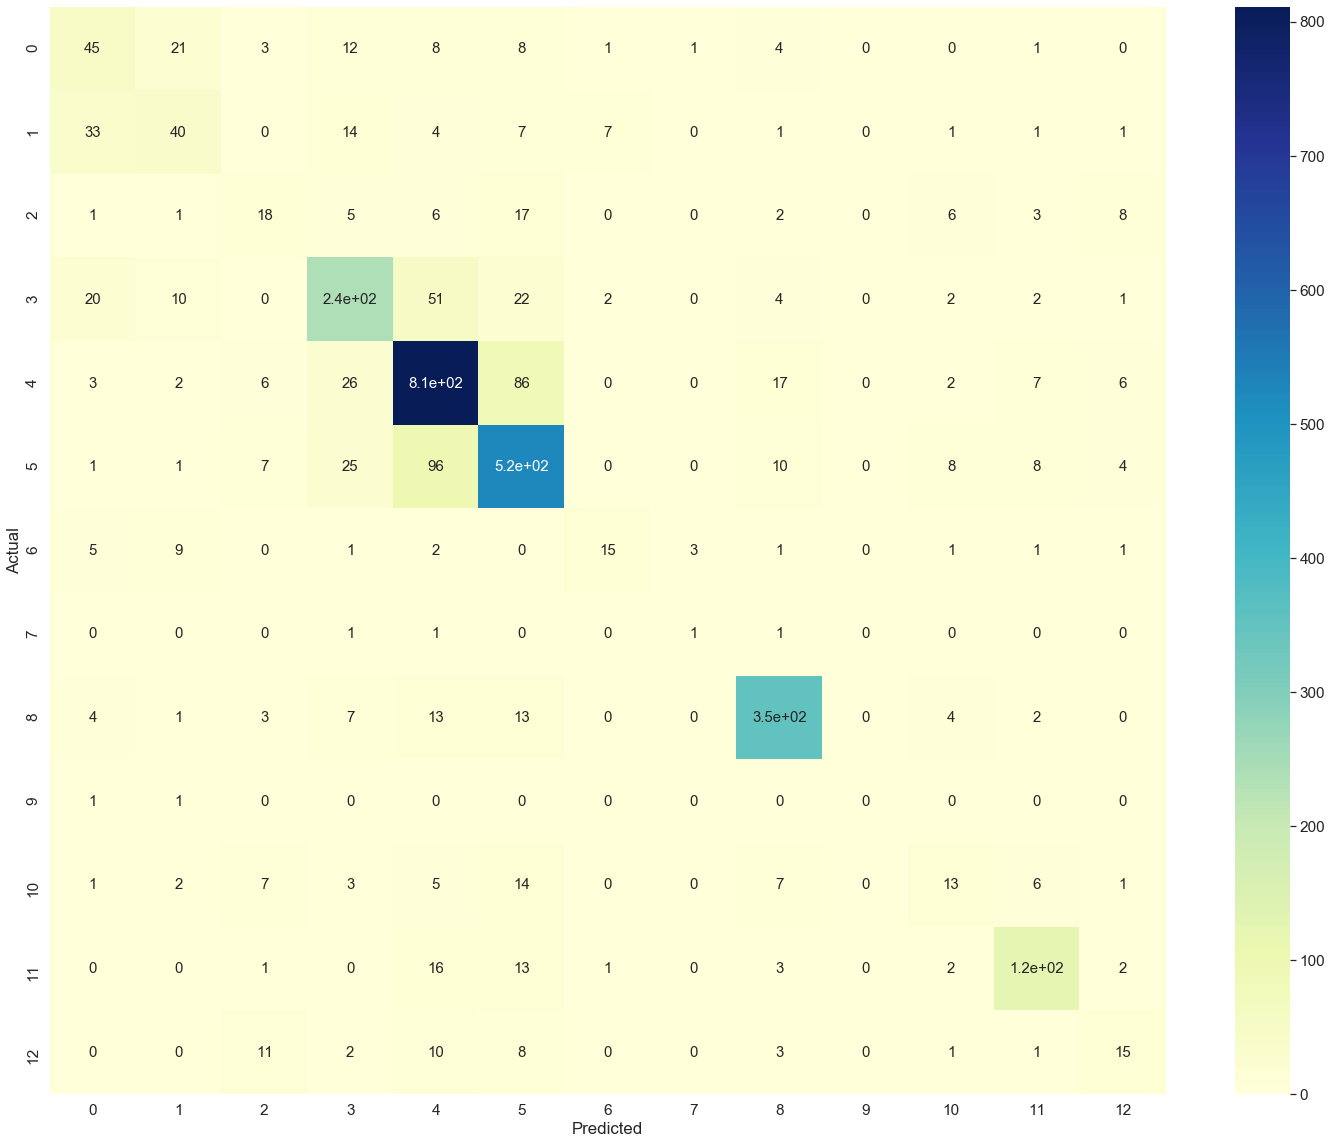

In [88]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 15})# font size

In [33]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

(0.7200812093203611, 0.7146666666666667, 0.71655472409961, None)

# Classifier - 02 (Decision Tree)

In [34]:
#Fitting the Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [35]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([4, 2, 5, ..., 4, 4, 5])

In [36]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 29,  16,   1,  19,  12,  13,   5,   1,   5,   0,   0,   2,   1],
       [ 25,  34,   0,  10,   9,  10,  13,   1,   5,   0,   1,   0,   1],
       [  3,   0,  14,   5,   9,  15,   0,   0,   7,   0,   4,   7,   3],
       [ 19,  14,   2, 196,  69,  39,   1,   1,   7,   1,   1,   4,   0],
       [ 10,   7,  11,  48, 711,  95,   1,   1,  38,   2,  15,  19,   8],
       [  5,   4,   9,  29, 136, 454,   2,   1,  17,   0,  12,  11,   4],
       [  6,   5,   1,   5,   3,   1,  13,   3,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,   1,   1,   1,   0,   0,   0,   0,   0],
       [  7,   2,  10,   5,  36,  27,   3,   0, 292,   0,   8,   6,   3],
       [  1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   2,   8,   2,   6,   3,   0,   0,  13,   0,  16,   7,   2],
       [  0,   2,   4,   2,  19,  23,   1,   0,   9,   1,   3,  98,   0],
       [  0,   1,  11,   5,  12,   6,   0,   0,   5,   0,   4,   1,   6]],
      dtype=int64)

In [37]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6213333333333333

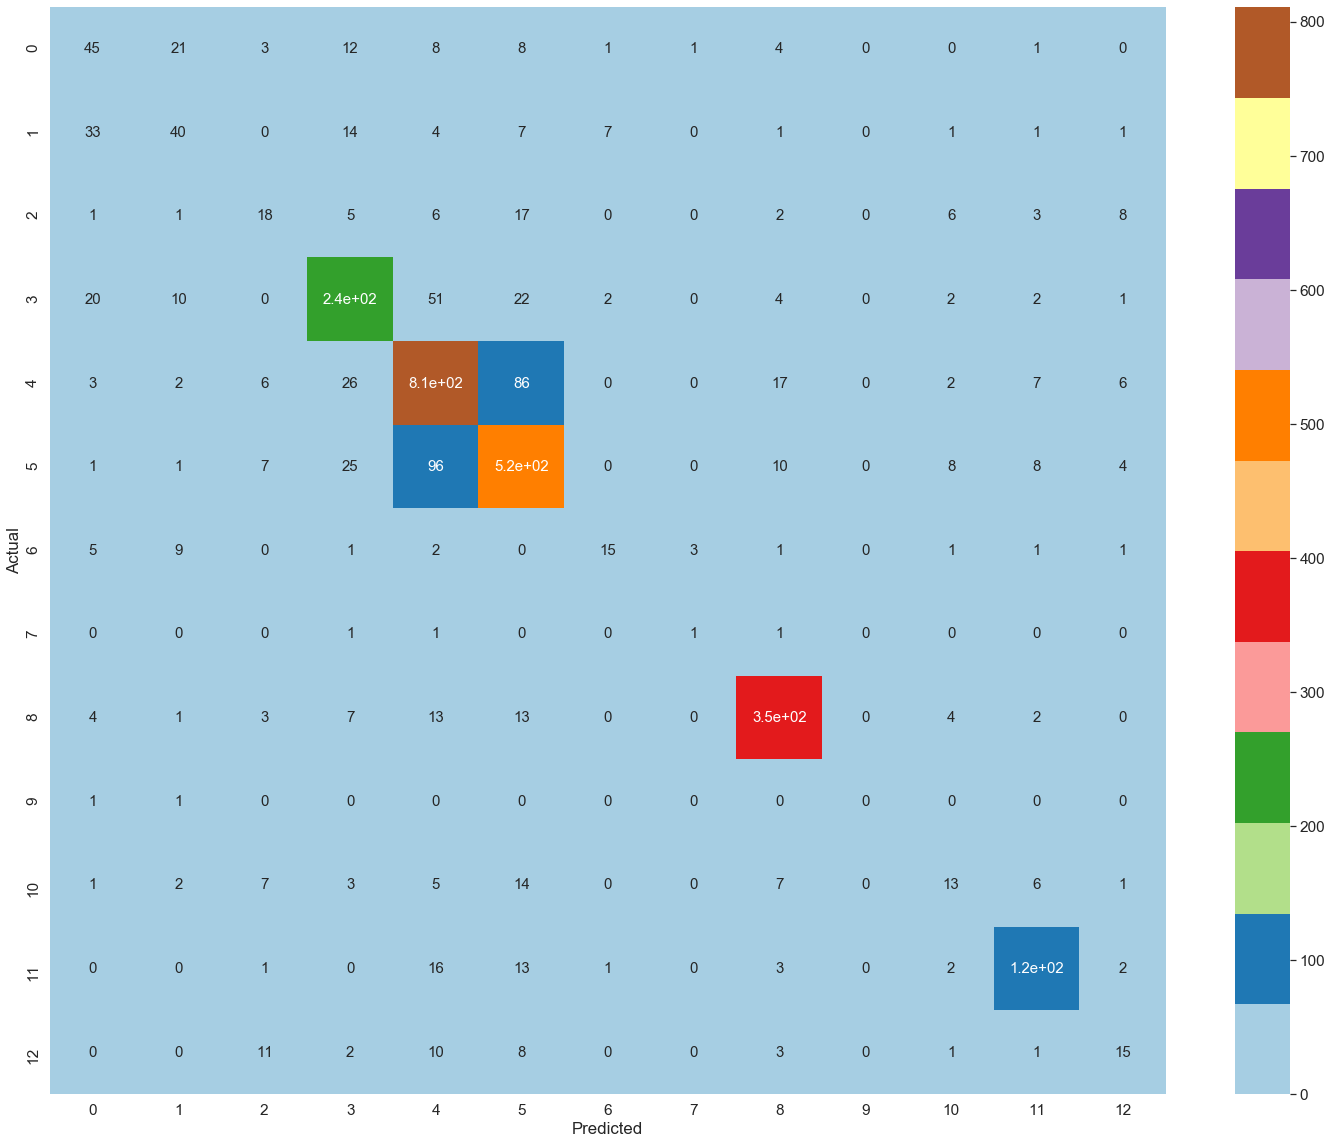

In [96]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Paired", annot=True,annot_kws={"size": 15})# font size

In [39]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

(0.6175353374070394, 0.6213333333333333, 0.6186680723330793, None)

# Classifier - 03 (Naive Bayes)

In [40]:
#Fitting the Classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 8, 5, ..., 4, 0, 5])

In [42]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 12,  17,   3,  29,   9,  12,   4,   0,  12,   0,   4,   1,   1],
       [ 15,  19,   3,  25,   9,  10,   7,   0,  16,   0,   2,   1,   2],
       [  1,   0,   5,   9,  12,  11,   0,   0,   8,   0,   4,   3,  14],
       [ 29,  24,   5, 139,  41,  28,  15,   4,  31,   0,  10,  19,   9],
       [ 61,  31,  57, 165, 304,  66,  42,  19,  34,   1,  72,  42,  72],
       [ 26,  37,  50,  79,  72, 189,  36,  10,  45,   1,  59,  44,  36],
       [  5,   7,   0,   7,   4,   4,   8,   0,   2,   0,   0,   1,   1],
       [  0,   0,   0,   2,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  9,   5,  10,  17,  64,  29,   1,   0, 249,   0,   2,   6,   7],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  3,   5,   4,  11,   5,  10,   0,   0,   7,   1,   5,   6,   2],
       [  3,   2,   5,   8,  27,  22,   0,   0,  11,   0,   5,  77,   2],
       [  3,   2,   1,   5,  16,  11,   0,   0,   2,   0,   3,   2,   6]],
      dtype=int64)

In [43]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.33766666666666667

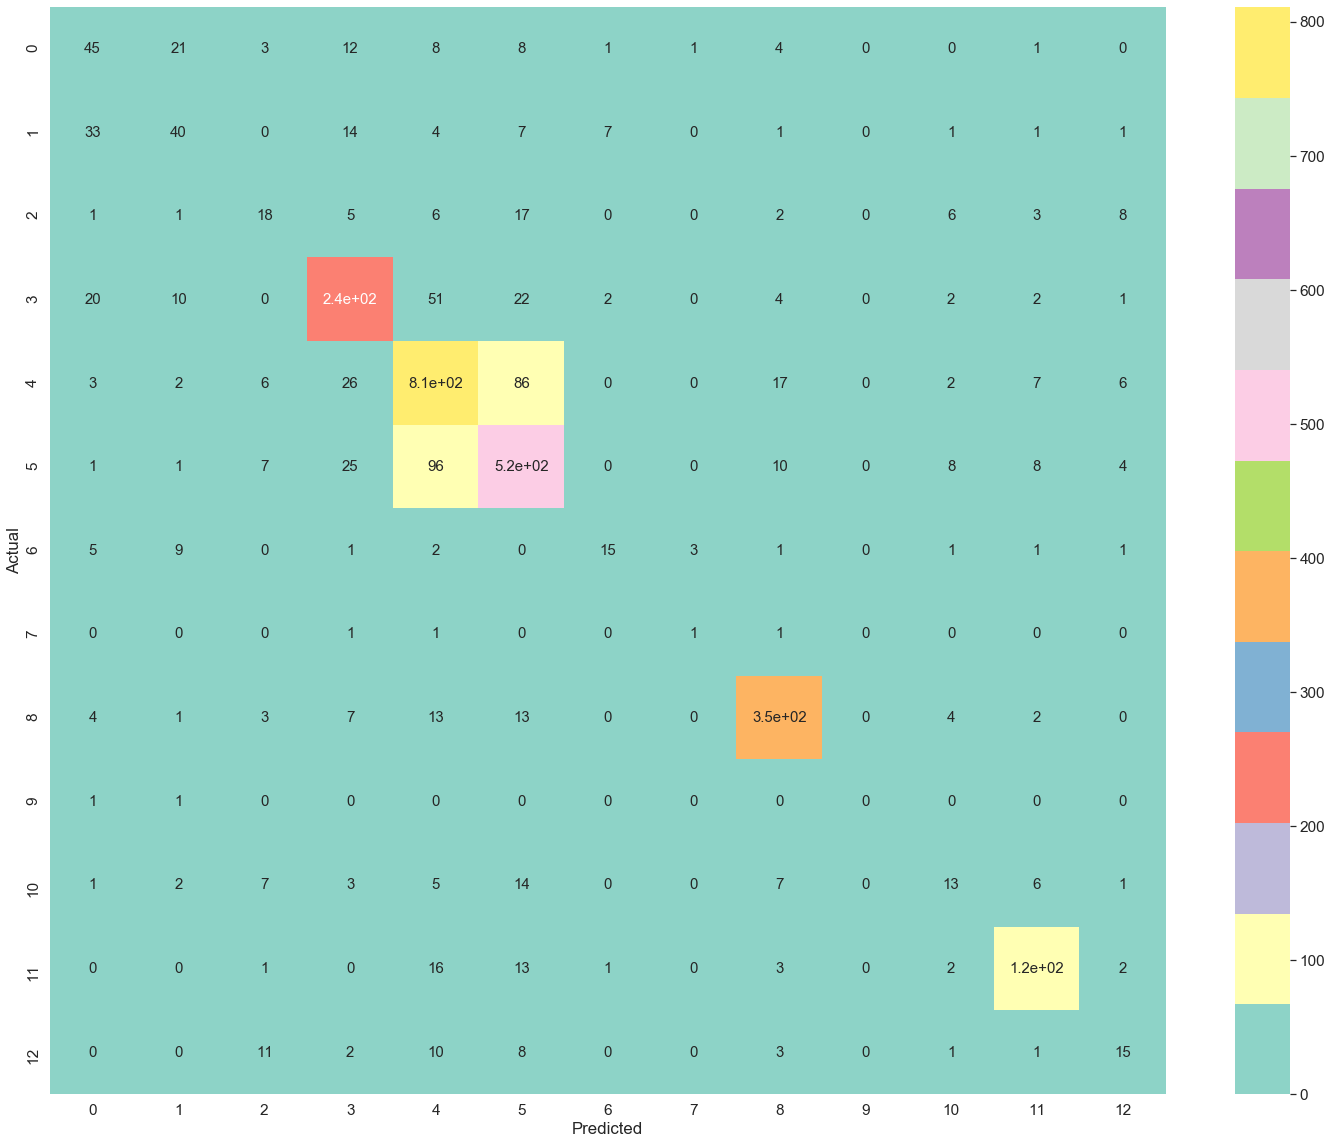

In [97]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Set3", annot=True,annot_kws={"size": 15})# font size

In [45]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

(0.4269054544775585, 0.33766666666666667, 0.3634368684119863, None)

# Classifier - 04 (Kernel SVM)

In [54]:
#Fitting the Classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([4, 5, 4, ..., 4, 4, 5])

In [56]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 48,   4,   1,  20,  23,   3,   0,   0,   5,   0,   0,   0,   0],
       [ 45,  21,   0,   8,  24,   4,   1,   0,   6,   0,   0,   0,   0],
       [  1,   0,  12,   3,  16,  18,   0,   0,  12,   0,   0,   5,   0],
       [  8,   2,   0, 234,  77,  21,   0,   0,  12,   0,   0,   0,   0],
       [  3,   0,   2,  17, 866,  57,   0,   0,  17,   0,   0,   4,   0],
       [  1,   0,   1,  11, 145, 503,   0,   0,  17,   0,   0,   5,   1],
       [  9,   2,   0,   5,  13,   5,   0,   0,   4,   0,   0,   1,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,  42,  14,   0,   0, 336,   0,   0,   3,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   5,  12,  17,   0,   0,  11,   0,   0,  13,   0],
       [  0,   0,   0,   2,  30,  13,   0,   0,  14,   0,   0, 103,   0],
       [  0,   0,   7,   2,  22,   6,   0,   0,  10,   0,   0,   2,   2]],
      dtype=int64)

In [57]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.7083333333333334

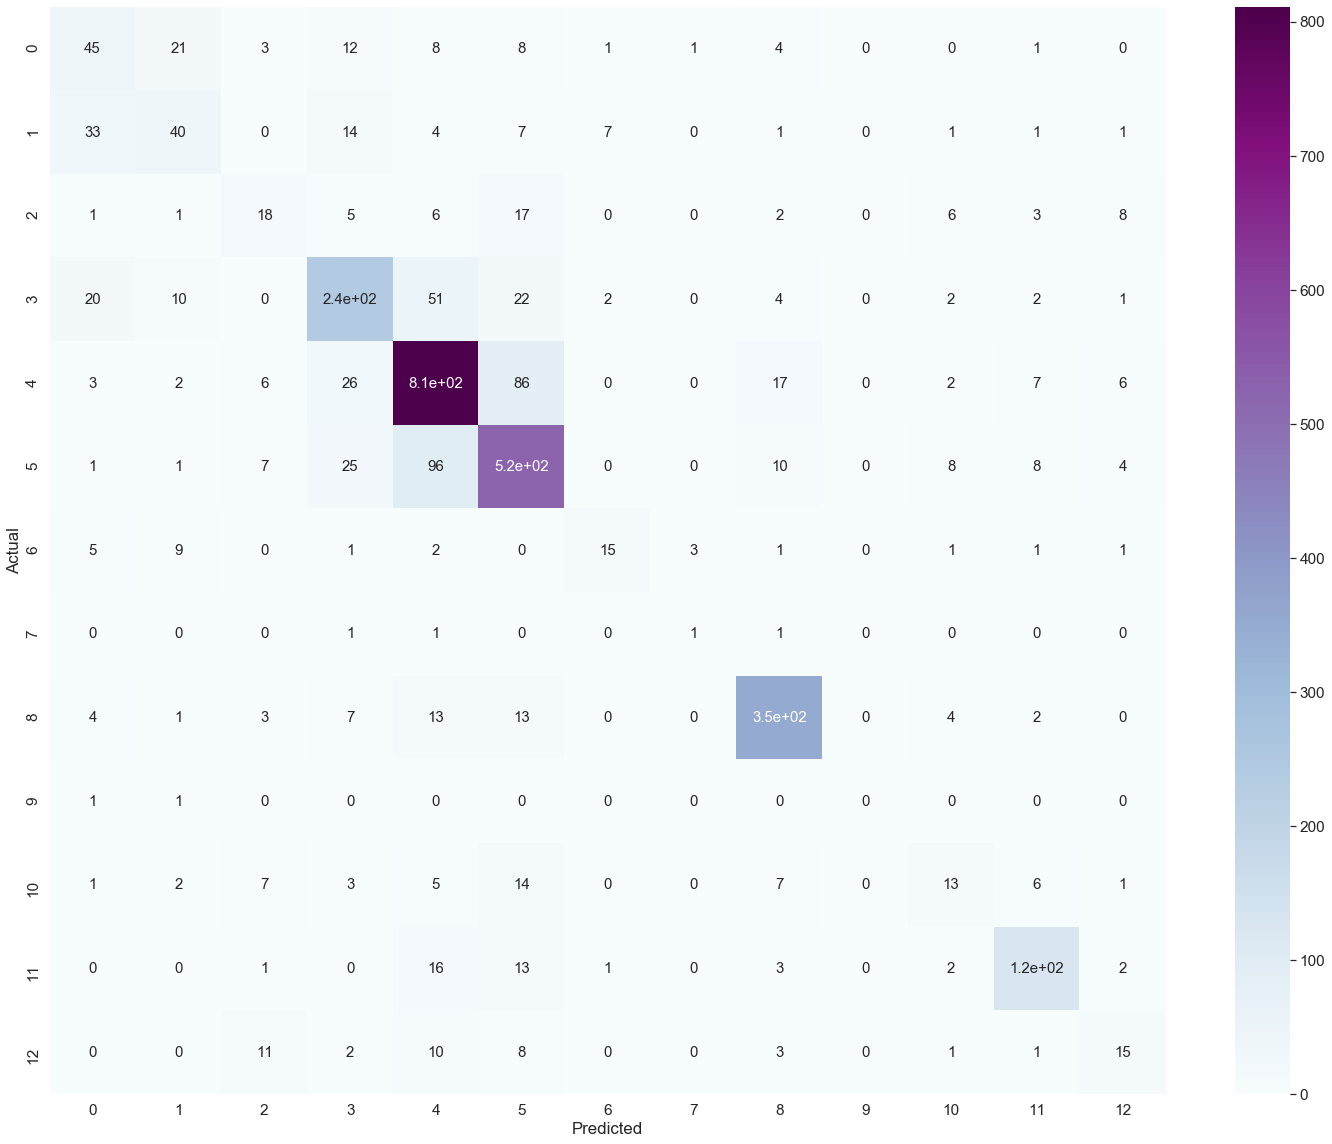

In [90]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="BuPu", annot=True,annot_kws={"size": 15})# font size

In [63]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

(0.6853512134992821, 0.7083333333333334, 0.6791547050028226, None)

# Classifier - 05 (Random Forest)

In [70]:
#Fitting the Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = "entropy", n_estimators = 100, random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([4, 5, 4, ..., 4, 4, 5])

In [72]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 19,  13,   0,  31,  21,  13,   0,   0,   7,   0,   0,   0,   0],
       [ 16,  23,   0,  31,  16,  16,   1,   0,   6,   0,   0,   0,   0],
       [  0,   0,   2,   9,  17,  23,   0,   0,  15,   0,   0,   1,   0],
       [  1,   0,   0, 212,  90,  41,   0,   0,   8,   0,   0,   2,   0],
       [  1,   0,   0,   9, 878,  61,   0,   0,  16,   0,   0,   1,   0],
       [  0,   0,   0,   5, 122, 535,   0,   0,  20,   0,   0,   2,   0],
       [  4,   1,   0,   8,   7,  11,   6,   0,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,  21,  17,   0,   0, 360,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   7,   7,  22,   0,   0,  15,   0,   0,   8,   0],
       [  0,   0,   0,   1,  30,  19,   0,   0,  11,   0,   0, 101,   0],
       [  0,   0,   0,   3,  24,  11,   0,   0,  13,   0,   0,   0,   0]],
      dtype=int64)

In [73]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.712

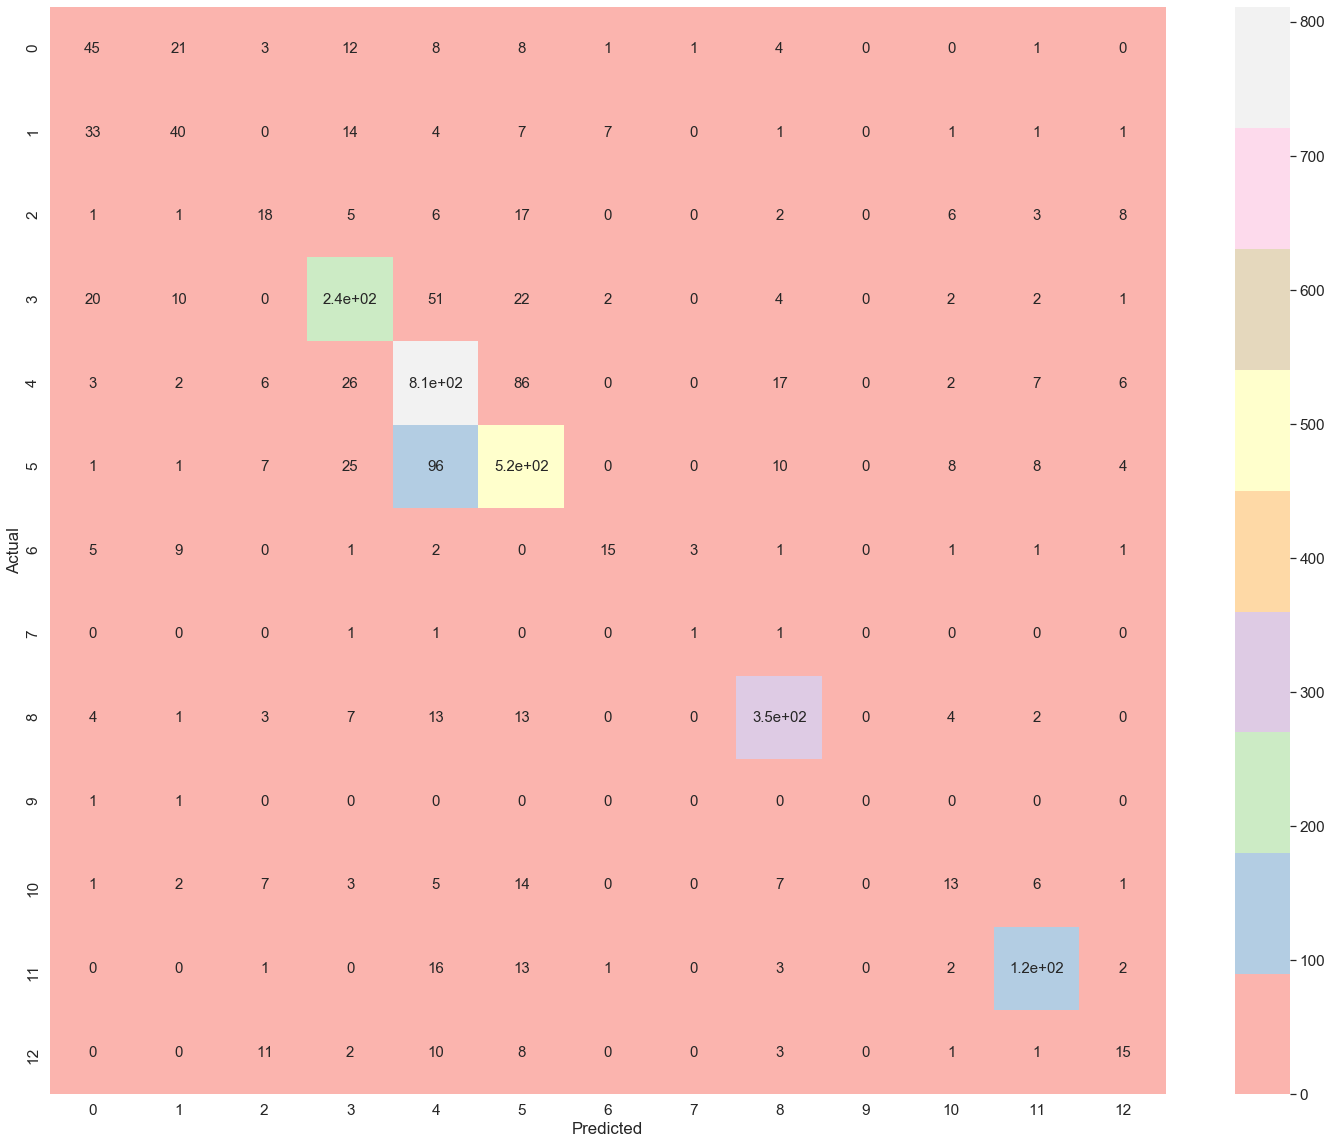

In [98]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Pastel1", annot=True,annot_kws={"size": 15})# font size

In [80]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

(0.684854159233491, 0.712, 0.6733953744849043, None)

# Classifier - 06 (MultiLayer Perceptron)

In [83]:
#Fitting the Classifier to the Training set
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(random_state=0)
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [84]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([5, 5, 5, ..., 4, 4, 5])

In [86]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 45,  21,   3,  12,   8,   8,   1,   1,   4,   0,   0,   1,   0],
       [ 33,  40,   0,  14,   4,   7,   7,   0,   1,   0,   1,   1,   1],
       [  1,   1,  18,   5,   6,  17,   0,   0,   2,   0,   6,   3,   8],
       [ 20,  10,   0, 240,  51,  22,   2,   0,   4,   0,   2,   2,   1],
       [  3,   2,   6,  26, 811,  86,   0,   0,  17,   0,   2,   7,   6],
       [  1,   1,   7,  25,  96, 524,   0,   0,  10,   0,   8,   8,   4],
       [  5,   9,   0,   1,   2,   0,  15,   3,   1,   0,   1,   1,   1],
       [  0,   0,   0,   1,   1,   0,   0,   1,   1,   0,   0,   0,   0],
       [  4,   1,   3,   7,  13,  13,   0,   0, 352,   0,   4,   2,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   7,   3,   5,  14,   0,   0,   7,   0,  13,   6,   1],
       [  0,   0,   1,   0,  16,  13,   1,   0,   3,   0,   2, 124,   2],
       [  0,   0,  11,   2,  10,   8,   0,   0,   3,   0,   1,   1,  15]],
      dtype=int64)

In [85]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.7326666666666667

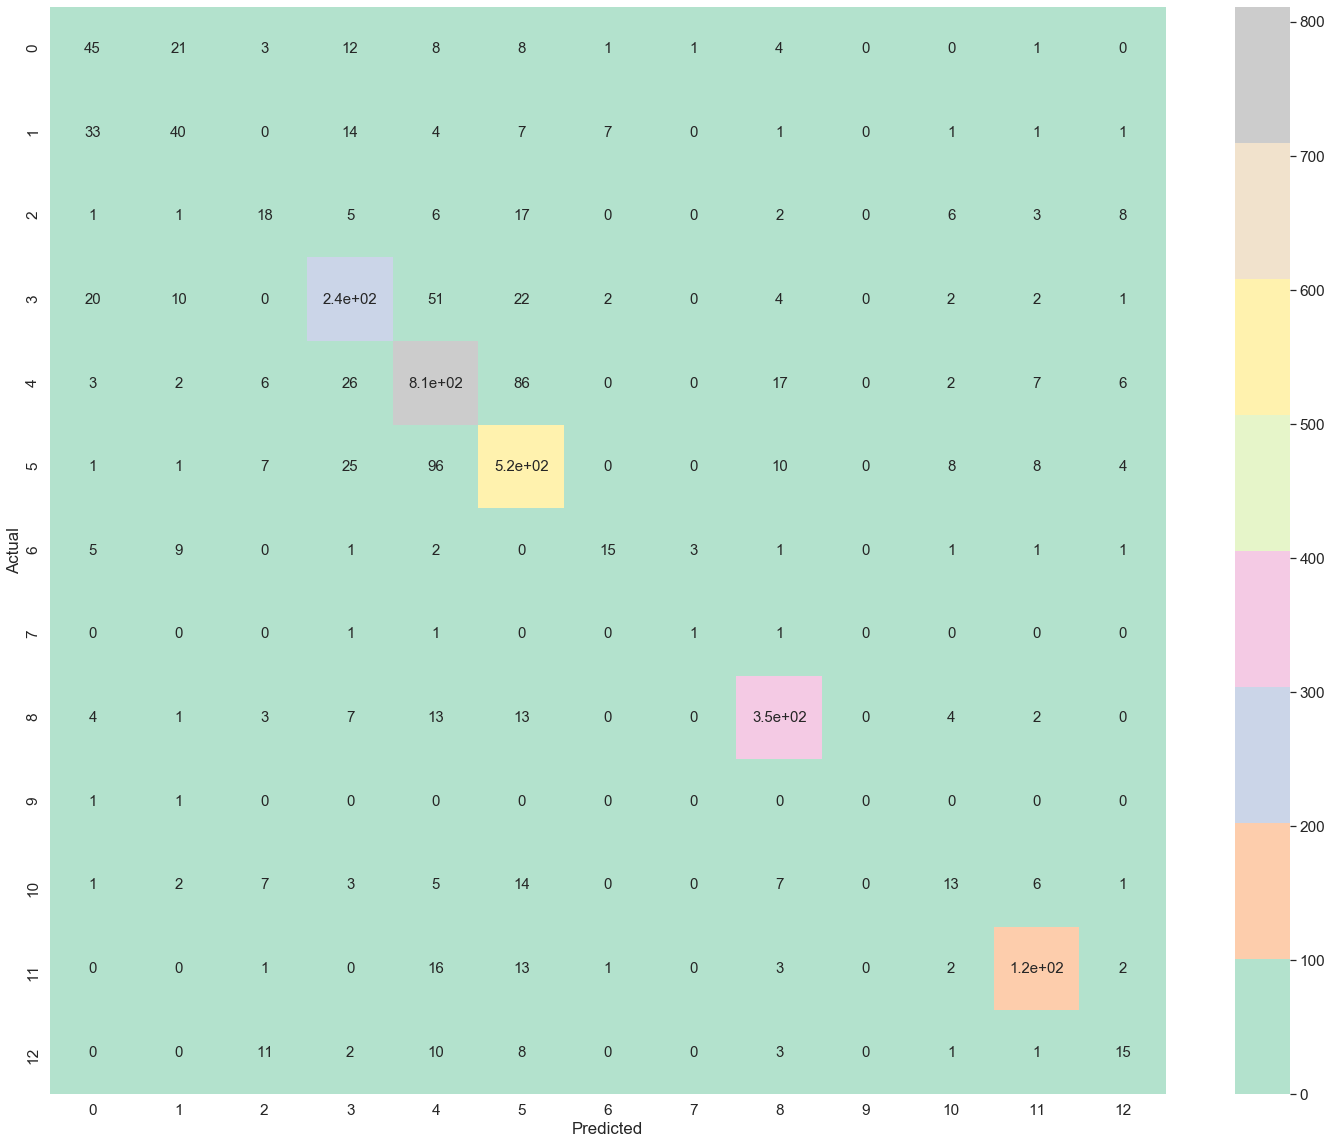

In [94]:
#Plotting the heatmap
%matplotlib inline
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (25,20))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Pastel2", annot=True,annot_kws={"size": 15})# font size

In [95]:
#Calculating the Precision, Recall, F1- Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average = 'weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7239471063265228, 0.7326666666666667, 0.7271385347568051, None)